# Import packages and functions

In [1]:
import sys
# force the notebook to look for files in the upper level directory
sys.path.insert(1, '../')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up constants

In [3]:
FULL_METRICS_PATH = "../data/processed/model_metrics_comparison_with_raw.xlsx"
REDUCED_METRICS_PATH = "../data/processed/xgboost_reduced_model_metrics.xlsx"
SCORING_METRICS = ["precision_weighted", "recall_weighted", "roc_auc", "f1_weighted"]
SAVE_PATH = "../plots/"
SAVE_PLOT = True

# Read in data

In [4]:
df_full_metrics = pd.read_excel(FULL_METRICS_PATH)
df_full_metrics["raw_metric"] = pd.eval(df_full_metrics["raw_metric"])
df_full_metrics.insert(1, "feature_set", "Full")
df_full_metrics

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,XGBClassifier,Full,Metal,precision_weighted,0.856410,0.025851,"[0.8695652173913043, 0.8627783669141039, 0.887..."
1,XGBClassifier,Full,Metal,recall_weighted,0.866667,0.017029,"[0.8695652173913043, 0.8695652173913043, 0.869..."
2,XGBClassifier,Full,Metal,roc_auc,0.859797,0.055158,"[0.8782894736842105, 0.8228228228228227, 0.915..."
3,XGBClassifier,Full,Metal,f1_weighted,0.856587,0.018977,"[0.8695652173913043, 0.8542761586239848, 0.861..."
4,XGBClassifier,Full,Insulator,precision_weighted,0.841515,0.030518,"[0.8458994708994709, 0.8386749482401656, 0.844..."
...,...,...,...,...,...,...,...
91,GradientBoostingClassifier,Full,MIT,f1_weighted,0.854939,0.032814,"[0.8497339390006488, 0.8695652173913043, 0.869..."
92,GradientBoostingClassifier,Full,Multiclass,precision_weighted,0.749709,0.034575,"[0.725281803542673, 0.7188735177865612, 0.7047..."
93,GradientBoostingClassifier,Full,Multiclass,recall_weighted,0.747343,0.038164,"[0.717391304347826, 0.7111111111111111, 0.7173..."
94,GradientBoostingClassifier,Full,Multiclass,roc_auc_ovr_weighted,0.894015,0.030698,"[0.8673883324913073, 0.9066339066339067, 0.840..."


In [5]:
df_reduced_metrics = pd.read_excel(REDUCED_METRICS_PATH)
df_reduced_metrics["raw_metric"] = pd.eval(df_reduced_metrics["raw_metric"])
df_reduced_metrics

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,XGBClassifier,Reduced,Metal,precision_weighted,0.841431,0.028773,"[0.8616021659499921, 0.8557252905078991, 0.840..."
1,XGBClassifier,Reduced,Metal,recall_weighted,0.835266,0.024638,"[0.8695652173913043, 0.8478260869565217, 0.822..."
2,XGBClassifier,Reduced,Metal,roc_auc,0.851351,0.026871,"[0.847972972972973, 0.8256578947368421, 0.8986..."
3,XGBClassifier,Reduced,Metal,f1_weighted,0.838054,0.025928,"[0.863129290617849, 0.8512872975277067, 0.8296..."
4,XGBClassifier,Reduced,Insulator,precision_weighted,0.807877,0.025974,"[0.8074534161490682, 0.8025210084033613, 0.786..."
5,XGBClassifier,Reduced,Insulator,recall_weighted,0.802174,0.017391,"[0.8043478260869565, 0.8, 0.782608695652174, 0..."
6,XGBClassifier,Reduced,Insulator,roc_auc,0.877000,0.011500,"[0.882, 0.878, 0.8742857142857142, 0.876, 0.86..."
7,XGBClassifier,Reduced,Insulator,f1_weighted,0.801477,0.017787,"[0.8023600681517005, 0.7975522692503824, 0.783..."
8,XGBClassifier,Reduced,MIT,precision_weighted,0.864743,0.026263,"[0.8666290231507624, 0.8204404291360813, 0.866..."
9,XGBClassifier,Reduced,MIT,recall_weighted,0.866667,0.024275,"[0.8695652173913043, 0.8260869565217391, 0.866..."


# Summary plot

## Bar plot version

In [6]:
df_for_plot = df_full_metrics.replace(
    {"metric_name": {"roc_auc_ovr_weighted": "roc_auc"}}).sort_values(by="metric_value", ignore_index=True, ascending=False)

/Users/jasonrpw/PycharmProjects/mit_model_code/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 720x720 with 0 Axes>

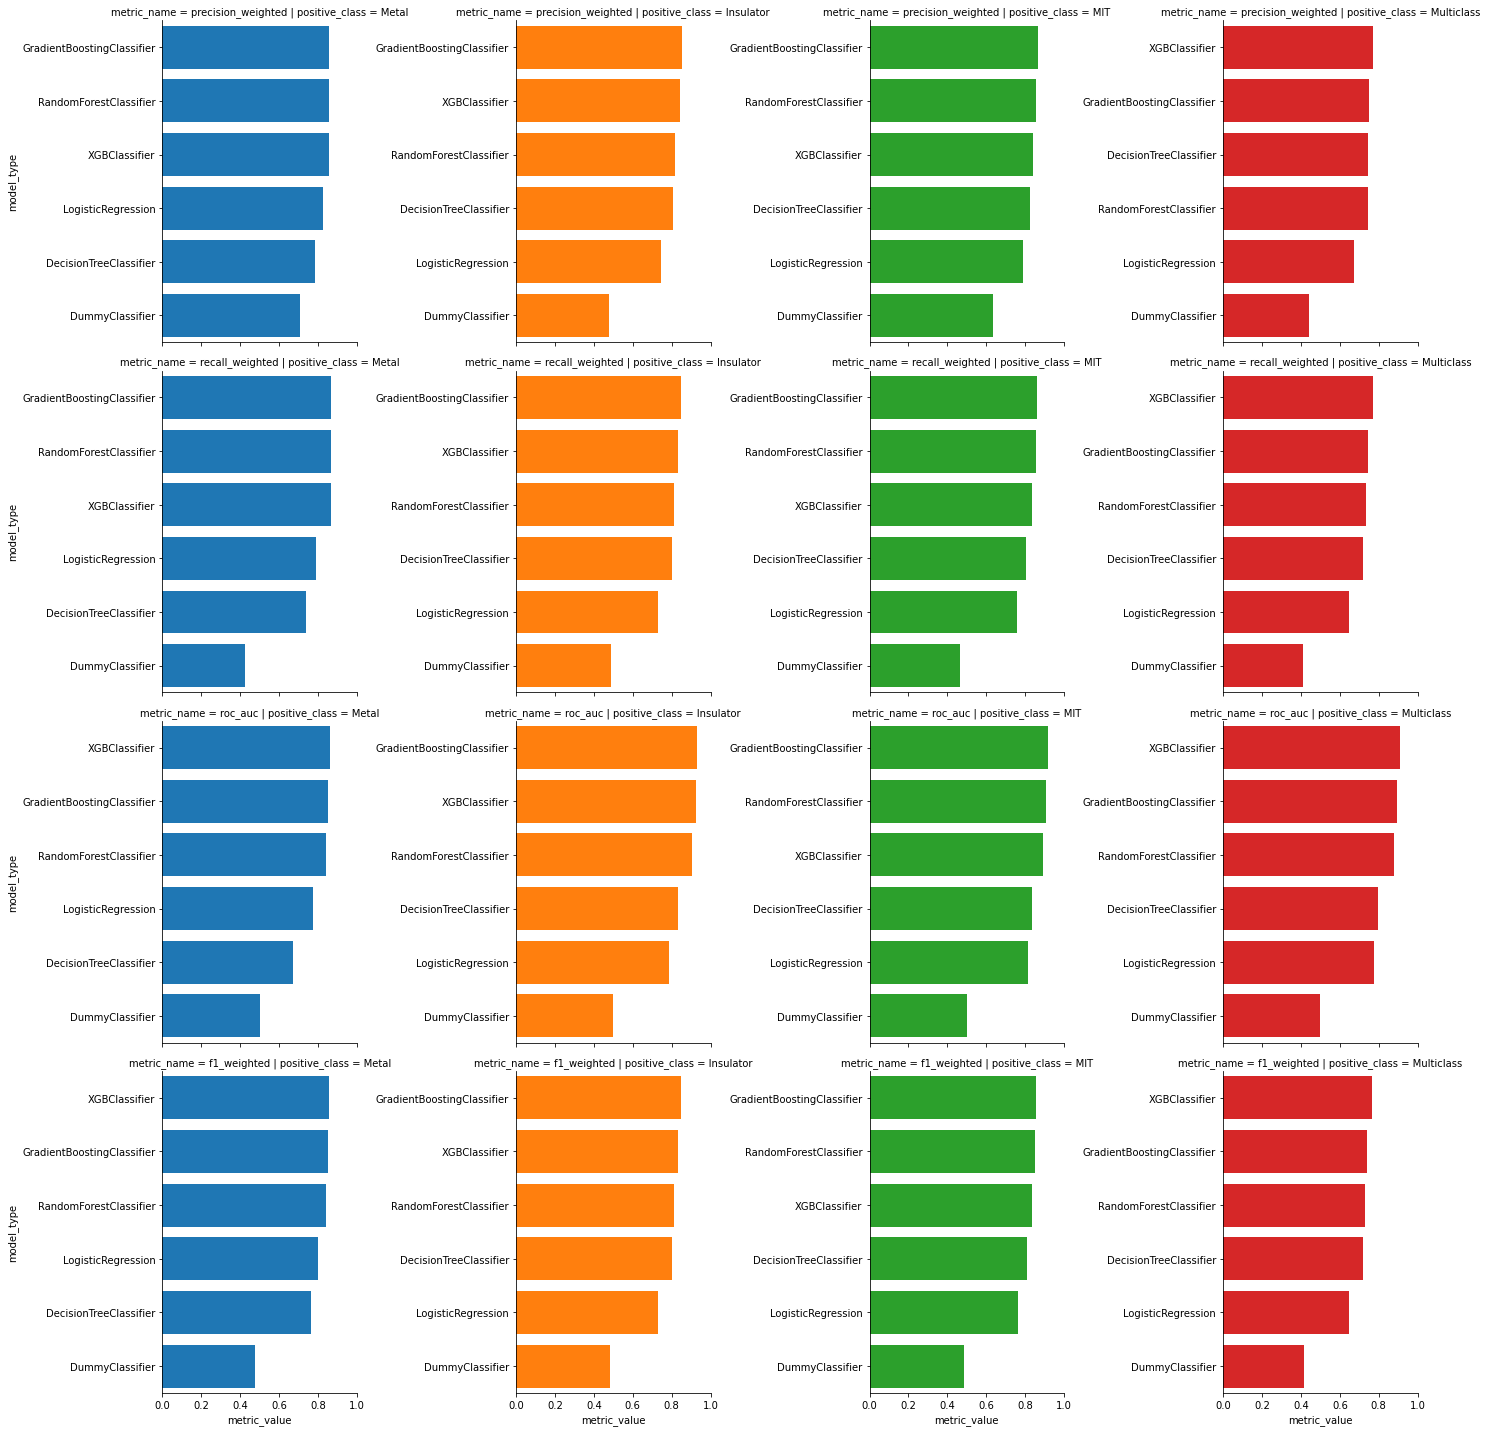

In [7]:
plt.figure(figsize=(10,10))
g_bar = sns.FacetGrid(df_for_plot, col="positive_class", row="metric_name", height=5, sharey=False,
                  col_order=["Metal", "Insulator", "MIT", "Multiclass"], row_order=SCORING_METRICS, 
                  hue="positive_class", hue_order=["Metal", "Insulator", "MIT", "Multiclass"],
                  xlim=(0, 1))
model_comparison_bar = g_bar.map(sns.barplot, "metric_value", "model_type", saturation=1)

In [8]:
def autolabel_bar(ax, **kwargs):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    
    Code adapted from https://matplotlib.org/3.3.1/gallery/lines_bars_and_markers/barchart.html
    """
    for rect in ax.patches:
        width = rect.get_width()
        x, y, xerrs = get_errorbars(**kwargs)
        ax.errorbar(x, y, xerr=xerrs, capsize=3, ls="none", ecolor="black")
        ax.annotate('{:.4f}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(-1, -12),
                    textcoords="offset points",
                    ha='right', va='center', fontsize=10, color="white")

        
def get_errorbars(metric_name, positive_class, df_input=df_for_plot):
    """Attach errorbars to each sub-barplot"""
    df_selected = df_input.loc[(df_input.metric_name == metric_name) & (df_input.positive_class == positive_class)]
    x_pos = df_selected.metric_value
    y_pos = range(len(df_selected.model_type))
    x_errs = df_selected.metric_dispersion / 2
    return x_pos, y_pos, x_errs

In [9]:
for (metric, pos_class), ax in g_bar.axes_dict.items():
    ax.set_ylabel(None)
    autolabel_bar(ax, metric_name=metric, positive_class=pos_class)

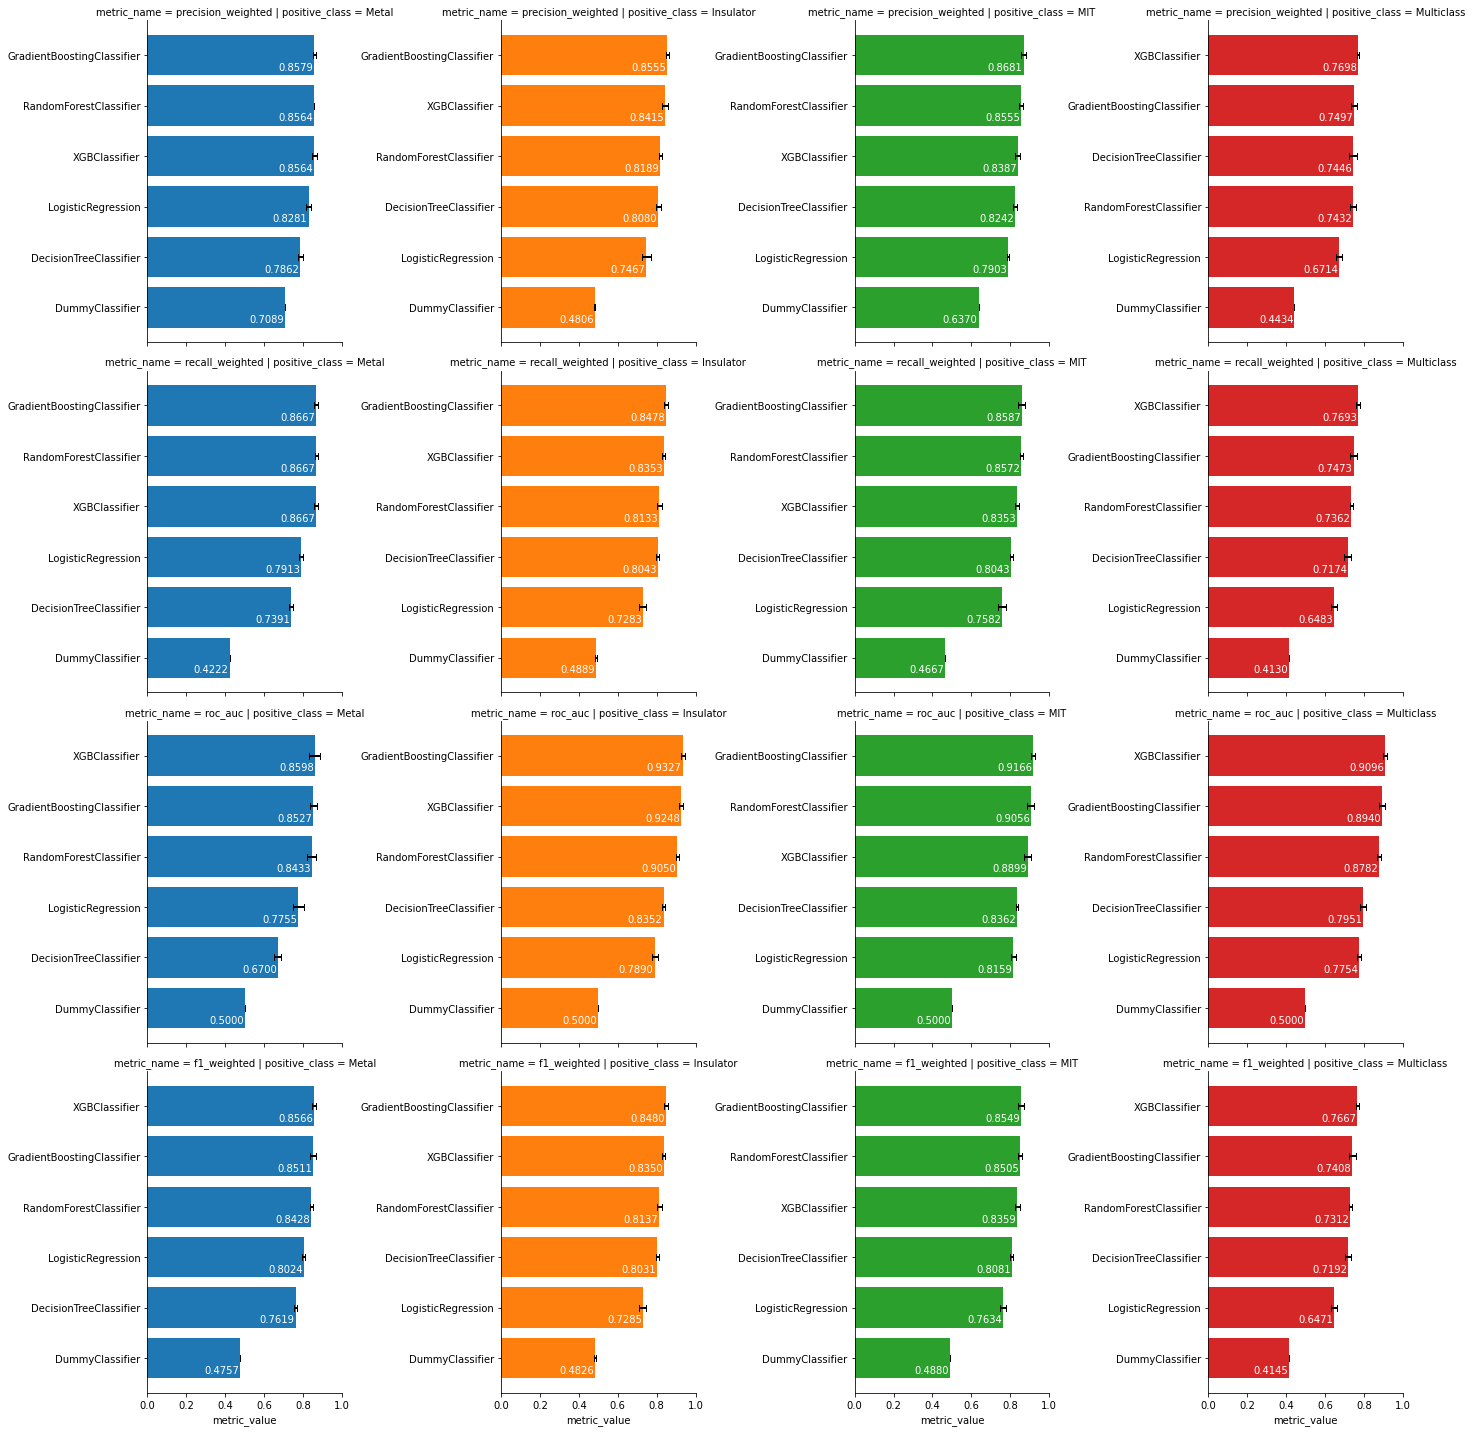

In [10]:
model_comparison_bar.fig

In [11]:
if SAVE_PLOT: model_comparison_bar.fig.savefig("../plots/model_comparison_bar.pdf", dpi=300, bbox_inches="tight")

## Boxplot version

In [12]:
df_for_boxplot = df_for_plot.drop(columns=["metric_dispersion"]).explode(column="raw_metric", ignore_index=True)
df_for_boxplot

,model_type,feature_set,positive_class,metric_name,metric_value,raw_metric
0,GradientBoostingClassifier,Full,Insulator,roc_auc,0.932667,0.912
1,GradientBoostingClassifier,Full,Insulator,roc_auc,0.932667,0.932
2,GradientBoostingClassifier,Full,Insulator,roc_auc,0.932667,0.916
3,GradientBoostingClassifier,Full,Insulator,roc_auc,0.932667,0.914
4,GradientBoostingClassifier,Full,Insulator,roc_auc,0.932667,0.940952
...,...,...,...,...,...,...
955,DummyClassifier,Full,Multiclass,recall_weighted,0.413043,0.413043
956,DummyClassifier,Full,Multiclass,recall_weighted,0.413043,0.413043
957,DummyClassifier,Full,Multiclass,recall_weighted,0.413043,0.413043
958,DummyClassifier,Full,Multiclass,recall_weighted,0.413043,0.413043


/Users/jasonrpw/PycharmProjects/mit_model_code/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jasonrpw/PycharmProjects/mit_model_code/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jasonrpw/PycharmProjects/mit_model_code/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments with

<Figure size 720x720 with 0 Axes>

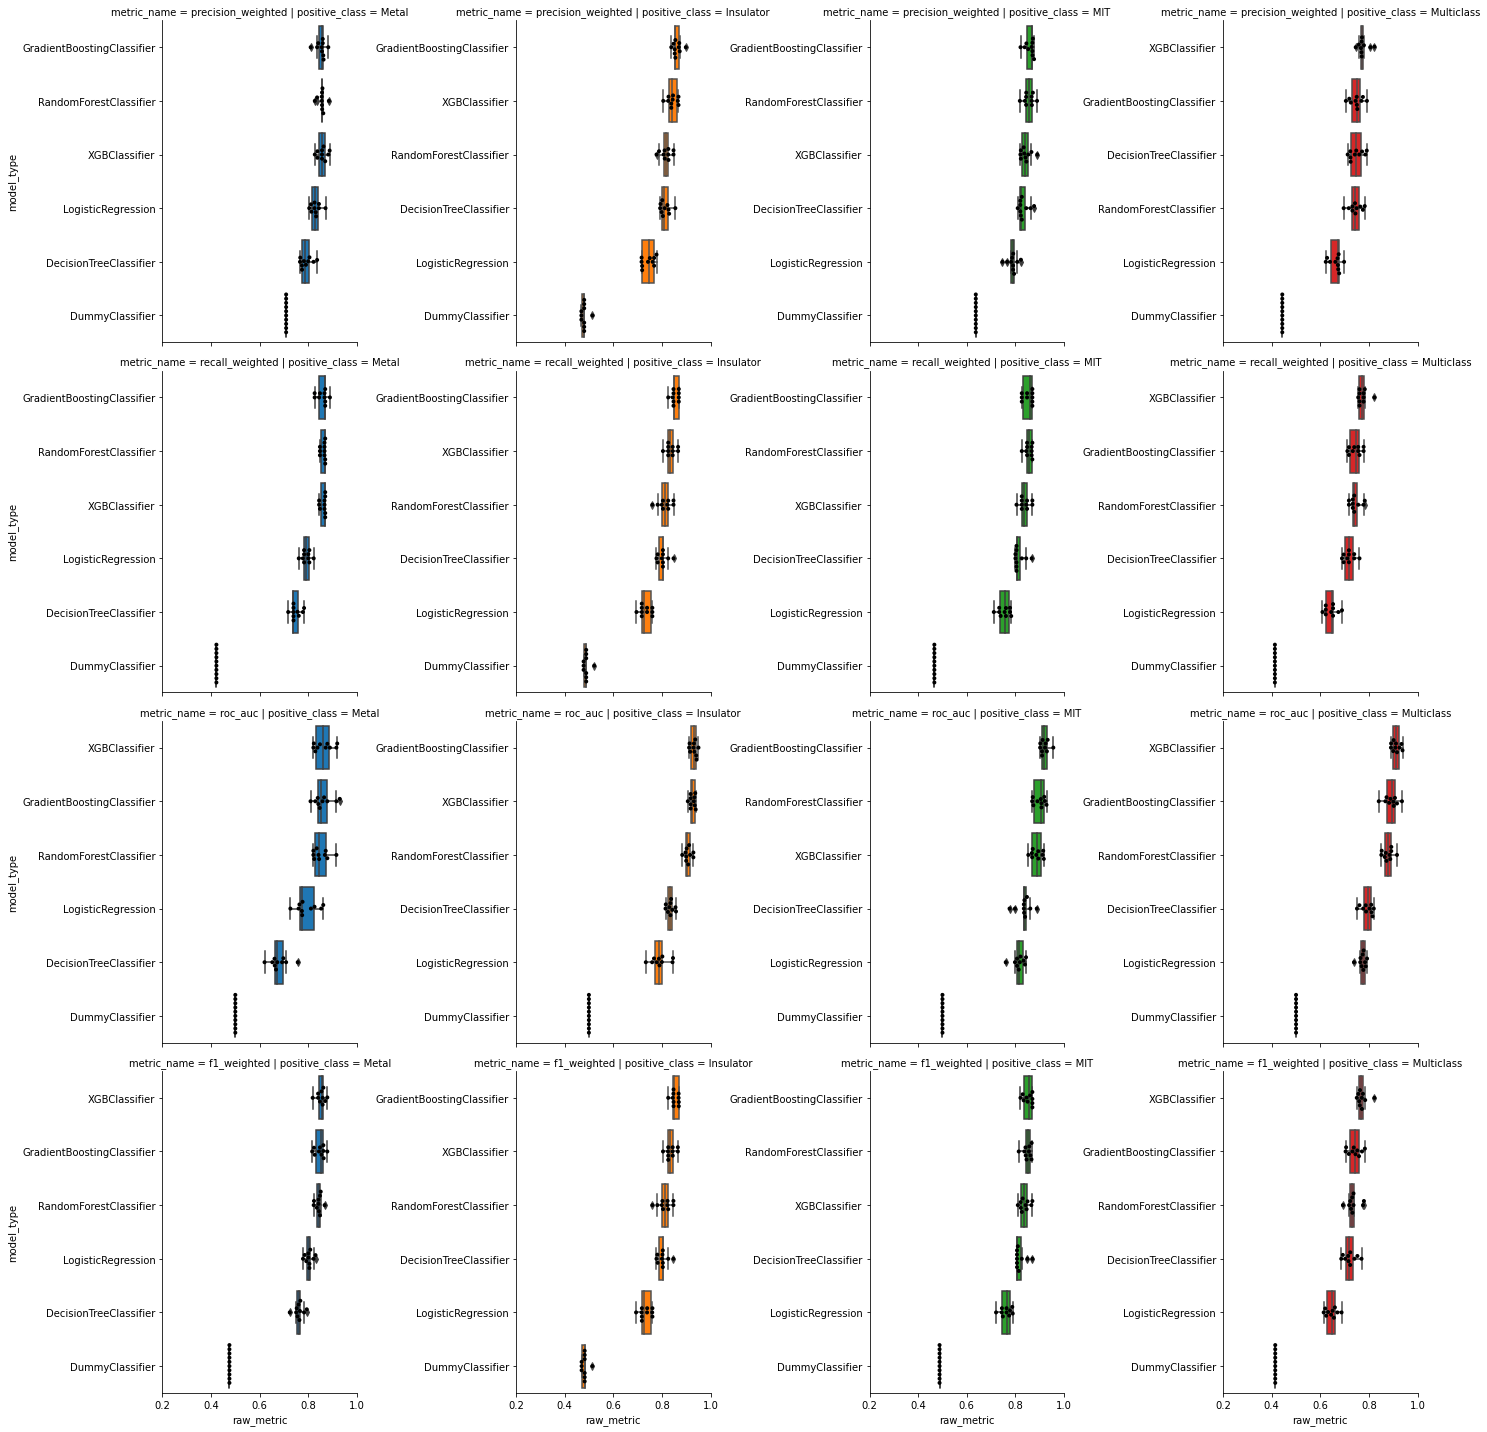

In [13]:
plt.figure(figsize=(10,10))

def fixed_boxplot(*args, label=None, **kwargs):
    """
    Custom boxplot function as a workaround for label error when sns.boxplot is passed to FacetGrid
    Adapted from https://github.com/mwaskom/seaborn/issues/915
    """
    sns.boxplot(*args, **kwargs, labels=[label])
    
g_box = sns.FacetGrid(data=df_for_boxplot, col="positive_class", row="metric_name", height=5, sharey=False, #aspect=2,
                      col_order=["Metal", "Insulator", "MIT", "Multiclass"], row_order=SCORING_METRICS, 
                      hue="positive_class", hue_order=["Metal", "Insulator", "MIT", "Multiclass"],
                      xlim=(0.2, 1))
model_comparison_boxplot = g_box.map(fixed_boxplot, "raw_metric", "model_type", saturation=1)
# overlay swarmplots on top of boxplots
g_box.map(sns.swarmplot, "raw_metric", "model_type", color="black", size=4)

In [14]:
def autolabel_box(ax, **kwargs):
    """
    Attach a text label besides each model type name, displaying the median value for the boxplot.
    
    Code adapted from https://matplotlib.org/3.3.1/gallery/lines_bars_and_markers/barchart.html
    """
    x_lst, y_lst, metric_lst = get_stats(**kwargs)
    for x, y, metric in zip(x_lst, y_lst, metric_lst):
        ax.annotate('{:.4f}'.format(metric),
                    xy=(x, y),
                    xytext=(-5, 0),
                    textcoords="offset points",
                    ha='left', va='center', fontsize=10, color="black")
    
        
def get_stats(metric_name, positive_class, df_input=df_for_plot, text_h_pos=0.24):
    """Get the stats to each sub-barplot"""
    df_selected = df_input.loc[(df_input.metric_name == metric_name) & (df_input.positive_class == positive_class)]
    num_models = len(df_selected.model_type)
    x_pos = [text_h_pos] * num_models
    y_pos = range(num_models)
    metric_values = df_selected.metric_value
    return x_pos, y_pos, metric_values

In [15]:
for (metric, pos_class), ax in g_box.axes_dict.items():
    ax.set_ylabel(None)
    autolabel_box(ax, metric_name=metric, positive_class=pos_class)

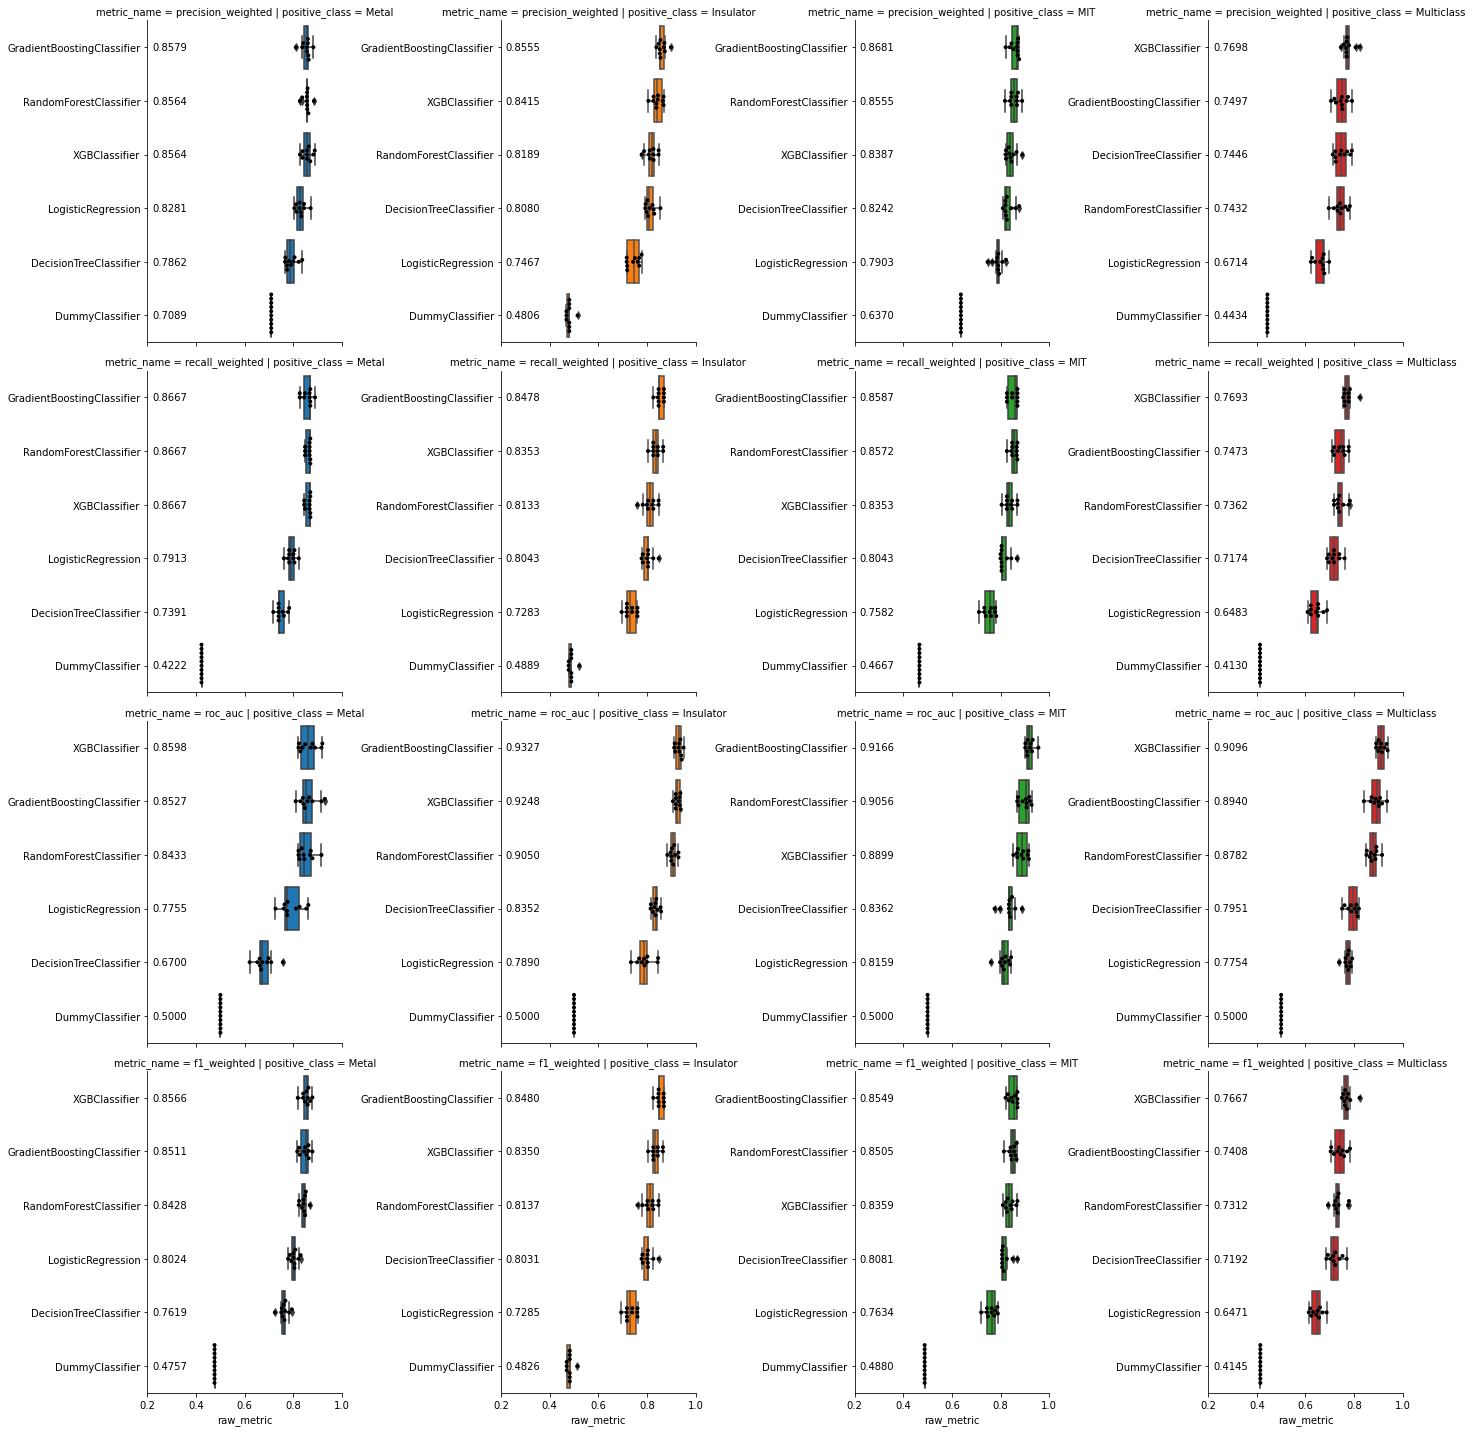

In [16]:
model_comparison_boxplot.fig

In [17]:
if SAVE_PLOT: model_comparison_boxplot.fig.savefig(SAVE_PATH + "model_comparison_boxplot.pdf", dpi=300, bbox_inches="tight")

# Compare metrics between the full feature set and reduced feature set models

In [18]:
TICK_SIZE = 19
BARWIDTH = 0.2
CAPSIZE = 5

In [19]:
df_combined_metrics = pd.concat([df_full_metrics, df_reduced_metrics], ignore_index=True)
df_combined_metrics = df_combined_metrics.query('model_type == "XGBClassifier" & positive_class != "Multiclass"')
df_combined_metrics["quartiles"] = df_combined_metrics.apply(lambda row: np.percentile(row["raw_metric"], [25, 75]) - row["metric_value"], axis=1)
df_combined_metrics

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric,quartiles
0,XGBClassifier,Full,Metal,precision_weighted,0.856410,0.025851,"[0.8695652173913043, 0.8627783669141039, 0.887...","[-0.014393234530534316, 0.011458248361747803]"
1,XGBClassifier,Full,Metal,recall_weighted,0.866667,0.017029,"[0.8695652173913043, 0.8695652173913043, 0.869...","[-0.01413043478260867, 0.0028985507246376274]"
2,XGBClassifier,Full,Metal,roc_auc,0.859797,0.055158,"[0.8782894736842105, 0.8228228228228227, 0.915...","[-0.02871621621621634, 0.026441737790421915]"
3,XGBClassifier,Full,Metal,f1_weighted,0.856587,0.018977,"[0.8695652173913043, 0.8542761586239848, 0.861...","[-0.014398666677842842, 0.0045781259167986255]"
4,XGBClassifier,Full,Insulator,precision_weighted,0.841515,0.030518,"[0.8458994708994709, 0.8386749482401656, 0.844...","[-0.011390851711217787, 0.019126822304739832]"
5,XGBClassifier,Full,Insulator,recall_weighted,0.835266,0.018357,"[0.8444444444444444, 0.8260869565217391, 0.844...","[-0.009178743961352653, 0.009178743961352653]"
6,XGBClassifier,Full,Insulator,roc_auc,0.924762,0.016905,"[0.9179999999999999, 0.918, 0.9180952380952381...","[-0.006738095238095099, 0.010166666666666768]"
7,XGBClassifier,Full,Insulator,f1_weighted,0.835031,0.018590,"[0.8447541618273327, 0.8260869565217391, 0.843...","[-0.008944120197317051, 0.009645655762554384]"
8,XGBClassifier,Full,MIT,precision_weighted,0.838685,0.025481,"[0.8363721365123888, 0.8657004830917875, 0.889...","[-0.0135246797622528, 0.011956109472300414]"
9,XGBClassifier,Full,MIT,recall_weighted,0.835266,0.021739,"[0.8260869565217391, 0.8695652173913043, 0.869...","[-0.009178743961352653, 0.01256038647342994]"


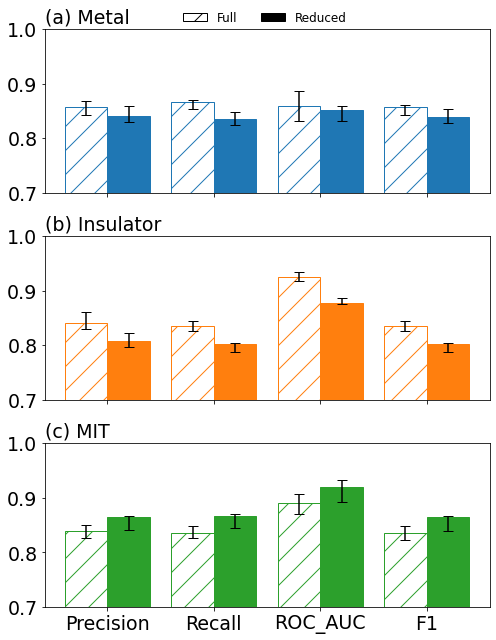

In [20]:
f, axarr = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(7, 9))

pos_classes = ["Metal", "Insulator", "MIT"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot the three subplots in the order of "Metal", "Insulator", "MIT"
for i, (pos_class, color) in enumerate(zip(pos_classes, colors)):
    tit = ['(a) Metal', '(b) Insulator', '(c) MIT'][i]
    df_subplot = df_combined_metrics.loc[df_combined_metrics.positive_class == pos_class]
    ax = sns.barplot(data=df_subplot, x="metric_name", y="metric_value", hue="feature_set", 
                     palette=sns.color_palette(("w", color)), hue_order=["Full", "Reduced"], saturation=1, ax=axarr[i], edgecolor=color, hatch="/")
    ax.errorbar(x=np.arange(4)-0.2, y=df_subplot.loc[df_subplot.feature_set == "Full"].metric_value, 
                yerr=abs(np.array(df_subplot.loc[df_subplot.feature_set == "Full"].quartiles.to_list()).T), ls="none", color="black", capsize=5)
    ax.errorbar(x=np.arange(4)+0.2, y=df_subplot.loc[df_subplot.feature_set == "Reduced"].metric_value, 
                yerr=abs(np.array(df_subplot.loc[df_subplot.feature_set == "Reduced"].quartiles.to_list()).T), ls="none", color="black", capsize=5)
    axarr[i] = ax
    if i == 0:
        axarr[i].legend(frameon=False, loc=(0.3, 1),
                        ncol=2, fontsize=12)
        leg = axarr[i].get_legend()
        leg.legendHandles[0].set_color("white")
        leg.legendHandles[0].set_edgecolor("black")
        leg.legendHandles[1].set_color("black")
    else:
        axarr[i].get_legend().remove()
    
    axarr[i].set_xlabel(None)
    axarr[i].set_ylabel(None)
    axarr[i].set_ylim(0.7, 1.0)
    axarr[i].set_yticks([0.7, 0.8, 0.9, 1])
    axarr[i].set_title(tit, loc='left', fontsize=TICK_SIZE)
    axarr[i].tick_params(labelsize=TICK_SIZE)
    
f.subplots_adjust(hspace=0.1)
# Hide x labels and tick labels for all but bottom plot.
plt.xticks((0, 1, 2, 3), ('Precision', 'Recall', 'ROC_AUC','F1'))
plt.tight_layout()

In [21]:
if SAVE_PLOT: f.savefig(SAVE_PATH + "full_reduced_models_comparison.pdf", dpi=300, bbox_inches="tight")

# Data exploration

In [22]:
df_full_metrics.loc[df_full_metrics.model_type == "XGBClassifier"]

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,XGBClassifier,Full,Metal,precision_weighted,0.856410,0.025851,"[0.8695652173913043, 0.8627783669141039, 0.887..."
1,XGBClassifier,Full,Metal,recall_weighted,0.866667,0.017029,"[0.8695652173913043, 0.8695652173913043, 0.869..."
2,XGBClassifier,Full,Metal,roc_auc,0.859797,0.055158,"[0.8782894736842105, 0.8228228228228227, 0.915..."
3,XGBClassifier,Full,Metal,f1_weighted,0.856587,0.018977,"[0.8695652173913043, 0.8542761586239848, 0.861..."
4,XGBClassifier,Full,Insulator,precision_weighted,0.841515,0.030518,"[0.8458994708994709, 0.8386749482401656, 0.844..."
5,XGBClassifier,Full,Insulator,recall_weighted,0.835266,0.018357,"[0.8444444444444444, 0.8260869565217391, 0.844..."
6,XGBClassifier,Full,Insulator,roc_auc,0.924762,0.016905,"[0.9179999999999999, 0.918, 0.9180952380952381..."
7,XGBClassifier,Full,Insulator,f1_weighted,0.835031,0.018590,"[0.8447541618273327, 0.8260869565217391, 0.843..."
8,XGBClassifier,Full,MIT,precision_weighted,0.838685,0.025481,"[0.8363721365123888, 0.8657004830917875, 0.889..."
9,XGBClassifier,Full,MIT,recall_weighted,0.835266,0.021739,"[0.8260869565217391, 0.8695652173913043, 0.869..."


In [23]:
def rank_metrics(metric_name, class_type, df_input=df_full_metrics):
    return df_input.loc[(df_input.positive_class == class_type) & (df_input.metric_name == metric_name)].sort_values(by="metric_value", ascending=False, ignore_index=True)

In [24]:
rank_metrics("precision_weighted", "MIT")

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,GradientBoostingClassifier,Full,MIT,precision_weighted,0.868116,0.023148,"[0.8525387655822437, 0.8695652173913043, 0.876..."
1,RandomForestClassifier,Full,MIT,precision_weighted,0.855524,0.023502,"[0.8716666666666666, 0.843840579710145, 0.8888..."
2,XGBClassifier,Full,MIT,precision_weighted,0.838685,0.025481,"[0.8363721365123888, 0.8657004830917875, 0.889..."
3,DecisionTreeClassifier,Full,MIT,precision_weighted,0.824185,0.019808,"[0.82, 0.8443817052512704, 0.8093944099378882,..."
4,LogisticRegression,Full,MIT,precision_weighted,0.790271,0.009925,"[0.8222826086956523, 0.7655172413793104, 0.794..."
5,DummyClassifier,Full,MIT,precision_weighted,0.636975,0.000000,"[0.6369747899159663, 0.6369747899159663, 0.636..."


In [25]:
rank_metrics("recall_weighted", "MIT")

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,GradientBoostingClassifier,Full,MIT,recall_weighted,0.858696,0.038043,"[0.8478260869565217, 0.8695652173913043, 0.869..."
1,RandomForestClassifier,Full,MIT,recall_weighted,0.857246,0.018841,"[0.8695652173913043, 0.8478260869565217, 0.869..."
2,XGBClassifier,Full,MIT,recall_weighted,0.835266,0.021739,"[0.8260869565217391, 0.8695652173913043, 0.869..."
3,DecisionTreeClassifier,Full,MIT,recall_weighted,0.804348,0.016304,"[0.8043478260869565, 0.8043478260869565, 0.804..."
4,LogisticRegression,Full,MIT,recall_weighted,0.758213,0.038768,"[0.7777777777777778, 0.7333333333333333, 0.782..."
5,DummyClassifier,Full,MIT,recall_weighted,0.466667,0.000000,"[0.4666666666666667, 0.4666666666666667, 0.466..."


In [26]:
rank_metrics("roc_auc", "MIT")

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,GradientBoostingClassifier,Full,MIT,roc_auc,0.916570,0.018884,"[0.9020979020979021, 0.9242424242424243, 0.929..."
1,RandomForestClassifier,Full,MIT,roc_auc,0.905586,0.037613,"[0.9277389277389277, 0.8712121212121212, 0.906..."
2,XGBClassifier,Full,MIT,roc_auc,0.889860,0.037733,"[0.8676470588235294, 0.8712121212121212, 0.914..."
3,DecisionTreeClassifier,Full,MIT,roc_auc,0.836247,0.010842,"[0.7979797979797979, 0.8356643356643357, 0.834..."
4,LogisticRegression,Full,MIT,roc_auc,0.815851,0.023766,"[0.8181818181818181, 0.76010101010101, 0.83333..."
5,DummyClassifier,Full,MIT,roc_auc,0.500000,0.000000,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."


In [27]:
rank_metrics("f1_weighted", "MIT")

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,GradientBoostingClassifier,Full,MIT,f1_weighted,0.854939,0.032814,"[0.8497339390006488, 0.8695652173913043, 0.869..."
1,RandomForestClassifier,Full,MIT,f1_weighted,0.850528,0.018898,"[0.8660485933503835, 0.8412098298676749, 0.855..."
2,XGBClassifier,Full,MIT,f1_weighted,0.835902,0.025543,"[0.8295807453416149, 0.8654997176736307, 0.869..."
3,DecisionTreeClassifier,Full,MIT,f1_weighted,0.808138,0.016560,"[0.8063492063492064, 0.8134923293361025, 0.806..."
4,LogisticRegression,Full,MIT,f1_weighted,0.763387,0.031523,"[0.7888888888888889, 0.743778801843318, 0.7869..."
5,DummyClassifier,Full,MIT,f1_weighted,0.488000,0.000000,"[0.48799999999999993, 0.48799999999999993, 0.4..."
